### Autre Méthode de représentation des orbites de Mars et de la Terre sur des cercle (Approximation des orbites circulaires)

Le problème ci dessous qui marche ne fonctionnait pas lors de la semaine 1 et 2. 

NameError: name 'animation' is not defined

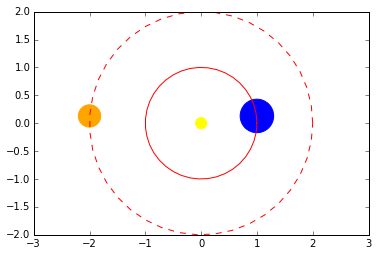

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#On commence par tracer trois cercles pleines représentants 
#le Soleil, Mars et la Terre (c'est une approximation)

circle1Soleil = plt.Circle((0, 0), 0.1, color='yellow')
circle2Mars = plt.Circle((-2, 0.13), 0.2, color='orange')
circle3Terre = plt.Circle((1, 0.13), 0.3, color='blue', clip_on=True)

fig, ax = plt.subplots() 
theta = np.linspace(0, 2*np.pi, 40)


# On trace maintenant les orbites (trajectoires) de Mars et de la Terre

x = np.cos(theta)
y = np.sin(theta)
plt.plot(x, y,"r-")
plt.axis("equal")
Alpha=np.linspace(0, 2*np.pi, 40)
a= 2*np.cos(Alpha)
b= 2*np.sin(Alpha)

plt.plot(a, b, "r--")
plt.axis("equal")
plt.xlim(-3,3)
ax.add_artist(circle1Soleil)
ax.add_artist(circle2Mars)
ax.add_artist(circle3Terre)


def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    patch2.center = (5, 5)
    ax.add_patch(patch2)
    line.set_data([],[])
    
    return patch, patch2, line

def animate(i):
    global b,T
    x, y = patch.center
    x = 0 + d1 * np.sin(np.radians(i)*v1)
    y = 0 + d1 * np.cos(np.radians(i)*v1)
    patch.center = (x, y)
    v, w = patch2.center
    v = 0 + d2 * np.sin(np.radians(i)*v2)
    w = 0 + d2 * np.cos(np.radians(i)*v2)
    patch2.center = (v, w)
    a=(b-y+x*(w-y)/(v-x))/((w-y)/(v-x))
    line.set_data([x,v],[y,w])
    if math.acos((x*v+w*y)/(d1*d2))<=(math.pi)/2 and T==True:
        if (b-d1 * np.cos(np.radians(i+5)*v1)+d1 * np.sin(np.radians(i+5)*v1)*(d2*np.cos(np.radians(i+5)*v2)-d1 * np.cos(np.radians(i+5)*v1))/(d2 * np.sin(np.radians(i+5)*v2)-d1 * np.sin(np.radians(i+5)*v1)))/((d2*np.cos(np.radians(i+5)*v2)-d1 * np.cos(np.radians(i+5)*v1))/(d2 * np.sin(np.radians(i+5)*v2)-d1 * np.sin(np.radians(i+5)*v1)))-a<0:
            b=b-0.06
            a=(b-y+x*(w-y)/(v-x))/((w-y)/(v-x))
        line.set_data([x,a],[y,b])
        plt.scatter(a,b)
    elif math.acos((x*v+w*y)/(d1*d2))>(math.pi)/2:
        line.set_data([x,v],[y,w])
        b=12
        T=True
    return patch, patch2, line





anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=10,
                               blit=True)


theta = linspace(0, 2*pi)

x = d1*cos(theta)
y = d1*sin(theta)
plot(x, y)

circle = plt.Circle((0, 0), radius=0.75, fc='none', color="green")
plt.gca().add_patch(circle)

A.draw_sun_and_orbit()

pylab.title('systeme soleil terre mars')

plt.legend(loc='upper left', handles=[patch, patch2,line])
pylab.xlabel('10^8m')
axis('equal')
xlim(-8,8)
ylim(-5,13)
plt.show()








plt.show()

### Parallaxe de Mars: Modéliser et Représenter sur Python 


J'ai voulu représenter sur Python la parallaxe de Mars. Ce qui était un challenge car cela a été fait très difficilement avec des heures de travail et de galères notamment sur l'utilisation des bibliothéques.

L'important était de chercher comment tracé très simplement des droites qui relient un point d'une position à un autre point d'une autre position.

J'ai donc décider à travers deux segments : A1Om et A2Om relier un point A1 à la surface de la Terre au centre de gravité de Mars. De même avec un autre point, pris par exemple au pôle sud de la Terre, A2 le relié au centre d'inertie de Mars. On peut dire plusieurs choses:

- D'abord au niveau Physique il faut revenir à la définition de ce que c'est que la parallaxe? (Voir partie Parallaxe)


- Le Parallaxe, est d'observer un objet ou un corps par exemple la planète Mars suivant deux positions différentes depuis l'astre dont on l'observe, donc la Terre. En choissisant deux positions différentes à la surface de la Terre, A1 et A2, on regarde le centre la planète Mars. La perception de la planète Mars n'est pas la même suivant le point dont on observe Mars. Ce phénomène ou effet est appelé Parallaxe. 
    
     
- Parallaxe Diurne: On l'utilise pour la mesure du parallaxe suivant les astres intérieur au système solaire (comme Mars!). On utilise comme étalon de référence le rayon de la Terre.


- Le but du parallaxe qui serait calculé par exemple depuis la Terre vers Mars (Parallaxe Diurne) est tout simplement d'obtenir, à partir de deux positions différentes et grâce aux angles obtenues, déterminer la distance entre la Terre et la planète Mars.

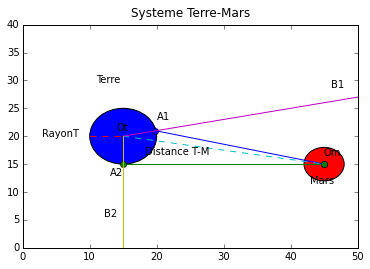

In [4]:
import numpy as np
from math import *
import matplotlib.lines as mlines
from matplotlib import pyplot as plt
from matplotlib import animation

#On définit les limites de notre schéma donc du repère, on donne un titre.
ax = plt.axes(xlim=(0, 50), ylim=(0, 40))
ax.set_title("Systeme Terre-Mars", va='bottom')  

#On établit deux fonctions permettant d'obtenir les deux planètes: 
#Terre et Mars. Les deux fonctions dépend de leur rayon 
#(supposé ici constante car orbite circulaire)
def Mars(RayonM): 
    Mars=plt.Circle((45, 15), RayonM, fc='red')
    return plt.gca().add_patch(Mars)

def Terre(RayonT):               
    Terre= plt.Circle((15, 20), RayonT, fc='blue')
    return plt.gca().add_patch(Terre)    


Terre(5)  #Les valeurs des rayons des deux planètes peuvent être calculés 
Mars(3)   #plus tard en Unité Astronomique (UA).

#On n'oublie surtout pas de tracer le segment reliant le centre de la
#Terre au centre de Masse que l'on appele "Distance T-M"
plt.annotate("Terre", xy = (8, 26), xytext = (20, 20), textcoords = 'offset points')
plt.annotate("Mars", xy = (40, 8), xytext = (20, 20), textcoords = 'offset points')
plt.annotate("Distance T-M", xy = (16, 14), xytext = (15, 15), textcoords = 'offset points')



#On crée un segment qui relie le point A1 au point Om(Origine de Mars)
x1, y1 = [19.75,45],[21,15]   #Coordonnés du segment A1P

#De même on peut créer un segment qui lie les deux points A2 et Om
x2, y2 = [15, 45], [15, 15]   #Coordonnés du segment A2P


plt.annotate("A1", xy = (20, 23), xytext = (0, 0), textcoords = 'offset points')
plt.annotate("A2", xy = (13, 13), xytext = (0, 0), textcoords = 'offset points')
plt.annotate("Ot", xy = (14, 21), xytext = (0, 0), textcoords = 'offset points')
plt.annotate("Om", xy = (45, 16.5), xytext = (0, 0), textcoords = 'offset points')


#On crée maintenant le segment qui relie le centre de la Terre au centre de Mars
X=[15,45]  #Coordonnée des valeurs en x (abscisse) de la distance Terre-Mars
Y=[20,15]  #Coordonnée des valeurs en y (ordonné) de la distance Terre-Mars

#On aura besoin de tracer le rayon de la Terre dans le cas du Parallaxe Diurne
x_rayonTerre=[10,15]         # Traçage du rayon de la Terre en x
y_rayonTerre=[20,20]         # Traçage du rayon de la Terre en y 

plt.annotate("RayonT", xy= (3, 20), xytext = (0, 0), textcoords = 'offset points')

#On trace maintenant la droite entre le point A1 et Ot (Origine Terre)
demi_droite_B1x=[15,50]      #Coordonnées B1 en x 
demi_droite_B1y=[20,27]       #Coordonnées B1 en y

#De même, on trace la droite reliant le point A2 et Ot
demi_droite_B2x=[15,15]    #Coordonnées B2 en x
demi_droite_B2y=[0,20]      #Coordonnées B2 en y

plt.annotate("B1", xy= (44, 26), xytext = (15, 15), textcoords = 'offset points')
plt.annotate("B2", xy= (10, 3), xytext = (15, 15), textcoords = 'offset points')


#Mode de Représentation et d'affichage de toutes les données
plt.plot(x1, y1,x2,y2,marker = 'o')   #On représente les points A1 et A2
plt.plot(x_rayonTerre,y_rayonTerre,'--')      #On représente le rayon de la Terre
plt.plot(X,Y,'------')                #On représente la distance entre Centre Terre et Centre Mars
                                      

plt.plot(demi_droite_B1x,demi_droite_B1y)
plt.plot(demi_droite_B2x,demi_droite_B2y)

plt.savefig('Kus Travail Parallaxe.png')
plt.show()

### Niveau Physique

 **1. Définition : parallaxe de Mars**

En Astronomie, la Parallaxe permet de déterminer la distance d'un objet éloigné sans avoir à y aller et sans mesurer directement la distance à l'objet. Pour cela, il faut pouvoir mesurer les angles avec suffisamment de précision. Pour un astre pas trop éloigné, il suffit de faire deux observations simultanées à partir de deux lieux éloignés sur la surface de la Terre pour en déterminer la distance et l'angle d'observtion.
On parle de parallaxe diurne pour les objets du Système solaire.
La parallaxe est un angle très petit, il s’exprime en secondes d’arc (").
La parallaxe, est d'observer un objet ou un corps par exemple la planète Mars suivant deux positions différentes depuis l'astre dont on l'observe, donc depuis la Terre. En choissisant deux positions différentes à la surface de la Terre, A1 et A2 que l'on relie au centre de Mars et à partir de deux droites OtA1 et OtA2 définissant respectivement les droites B1 et B2, on peut retrouver la valeur de notre parallaxe avec l'angle formé entre les droites A1Om et B1  ainsi que entre A2Om et B2 ( l'angle B1A1Om et l'angle B2A2Om; Dans ce cas on a le parallaxe horizontale: on voit le rayon terrestre RayonT). Ainsi, la perception de la planète Mars n'est pas la même suivant le point dont on observe Mars depuis la Terre. C'est ce phénomène ou effet qui est appelé Parallaxe. 
    
    
_Paranthèse (Cette méthode a donné une nouvelle unité de distance : le parsec est la distance correspondant à une parallaxe d’une seconde)._

Le but du parallaxe est tout simplement d'obtenir et détérminer, à partir de deux positions différentes et grâce aux angles obtenues, la distance entre la Terre et la planète Mars c'est-à-dire la distance OtOm sur la figure.

 **2. Le Système Soleil, Terre et Mars et modélisation du Système Solaire**

On cherche dans notre projet à comprendre le mouvement du système Soleil, Terre et Mars. Mais tout d'abord nous avons décidé d'effectuer une  modélisation du système Solaire en considèrant que le centre du Système Solaire est le Soleil car le centre de mase du Système Solaire est situé à l'intérieur de l'atmosphère du Soleil et surtout la distance qui sépare le centre du Soleil du Centre de Masse est inférieur au rayon du Soleil. C'est donc une approximation réaliste du système solaire Gravitationnel.( Voir le tableau dans le Tutoriel sur la Voie Lactée pour avoir les masses intérieures et la position du Centre de Masse). Ainsi le Soleil tourne autour du centre de masse, et donc tourne autour de lui même. De plus, les orbites de la Terre et de Mars sont des ellipses presque circulaire. C'est que l'on approxime pour la suite. Ces mouvements circulaires sont dûs en partie à l'excentricité des deux planètes qui est proche de 0 et de nos hypothèse afin de simplifier la modélisation.

On considère aussi leur vitesses radiales comme constantes ce qui nous permet de tracer leur trajectoire qui est un mouvement circulaire uniforme. Lorsque la Terre effectue une période autour du Soleil Mars en fait 1.88 Période. Et c'est cette différence qui permet de visualiser le mouvement rétrograde de Mars dans le référentiel Géocentrique lié à la Terre.


  **3. Mouvement Rétrograde de Mars dans le référentiel Géocentrique**

Pendant la séance de kinesthésie nous avons retrouver ce mouvement rétrograde de Mars grâce à une corde qui représente la droite qui relie les origines des deux planètes. Lorsque l'on projete la position de Mars par rapport à la Terre on observe bien que Mars retourne en arrière dans son mouvement puis reprend son mouvement prograde. Mars fait des aller-retour durant une courte péiode de son mouvement. Ce mouvement est observable en utilisant la méthode de la parallaxe

=> MONTRER LA VIDEO SUR LA KINESTHESIE.

A un instant donné de son mouvement la planète rouge arrête son mouvement direct d’ouest en est par rapport au fond de ciel étoilé, pour repartir dans l’autre direction, d’est en ouest : c’est le mouvement rétrograde.
Aucune planète ne se met à reculer ainsi sur son orbite : le mouvement rétrograde est une illusion c'est-à-dire que ce mouvement n'est visible que dans le référentiel Géocentrique.
Ce mouvement n'est donc visible que par un observateur sur terre et à la projection sur le ciel. Cela est dû à une différence de vitesse orbitale. 
L’orbite de la Terre est plus petite que celle de Mars, et la Terre tourne plus rapidement autour du Soleil. Lorsque la Terre et Mars se retrouvent du même côté du Soleil, la Terre rattrape et dépasse Mars, qui semblera reculer pendant quelques semaines par rapport aux étoiles lointaines que l'on considèe fixe car ils sont situés à l'inifini.

Il existe deux référentiels pour étudier le mouvement de rotation de Mars dans le système solaire:

1. Dans le référentiel héliocentrique, on peut voir une rotation circulaire et uniforme.
2. Dans le référentiel géocentrique, cependant, la trajectoire de Mars ressemble à une **cardioïde**. Mars se déplace dans une direction, revient sur ses pas (d'où le mot "rétrograde"), puis retourne dans la direction initiale. 
